In [2]:
from flask import Flask, request, Response, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
#load data
file_path = "C:/Users/HW/Desktop/CMU/Software Design for Data Scientists/SoftwareDesign-for-DataScientists/Data/Raw/avsurvey2019data.csv"
av_2019Survey = pd.read_csv(file_path)

In [3]:
av_2019Survey

,RespondentID,StartDate,EndDate,FamiliarityNews,FamiliarityTech,SharedCyclist,SharedPedestrian,SafeAv,SafeHuman,AvImpact,...,SchoolZoneManual,ShareTripData,SharePerformanceData,ReportSafetyIncident,ArizonaCrash,ZipCode,BikePghMember,AutoOwner,SmartphoneOwner,Age
0,10505419886,2/2/2019,2/2/2019,To a moderate extent,Somewhat familiar,Yes,Yes,4.0,2.0,Significantly Better,...,No,Not sure,Yes,Yes,No change,15212,No,Yes,Yes,25-34
1,10505138734,2/2/2019,2/2/2019,To a moderate extent,Somewhat familiar,Yes,No,5.0,4.0,Significantly Better,...,No,No,Yes,Not sure,No change,15232,Not sure,Yes,Yes,25-34
2,10504803283,2/1/2019,2/1/2019,To a moderate extent,Somewhat familiar,Yes,Yes,1.0,4.0,Significantly Worse,...,No,No,No,Not sure,Significantly more negative opinion,NaN,No,No,No,NaN
3,10504337177,2/1/2019,2/1/2019,To a moderate extent,Extremely familiar,Yes,Yes,2.0,3.0,Slightly Worse,...,Yes,No,Yes,Yes,No change,15136,No,No,Yes,55-64
4,10504261546,2/1/2019,2/1/2019,To a moderate extent,Mostly familiar,Yes,No,5.0,3.0,Slightly Better,...,Not sure,Yes,Yes,No,No change,15201,Yes,No,Yes,35-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,10470569905,1/16/2019,1/16/2019,To a moderate extent,Extremely familiar,Yes,No,4.0,2.0,Slightly Better,...,Yes,Yes,Yes,Yes,Somewhat more negative opinion,15236,No,Yes,Yes,45-54
791,10470569171,1/16/2019,1/16/2019,To a moderate extent,Mostly familiar,Yes,Yes,4.0,2.0,Slightly Better,...,Not sure,Yes,Yes,Not sure,No change,15201,Yes,Yes,Yes,35-44
792,10470532863,1/16/2019,1/16/2019,To a moderate extent,Somewhat familiar,Yes,Yes,4.0,4.0,Significantly Better,...,Yes,Yes,Yes,Yes,No change,15201,Not sure,Yes,Yes,35-44
793,10470438828,1/16/2019,1/16/2019,To some extent,Somewhat familiar,Yes,No,5.0,1.0,Significantly Better,...,No,No,No,Yes,No change,15217,No,Yes,Yes,55-64


In [4]:
av_2019Survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RespondentID          795 non-null    int64  
 1   StartDate             795 non-null    object 
 2   EndDate               795 non-null    object 
 3   FamiliarityNews       794 non-null    object 
 4   FamiliarityTech       794 non-null    object 
 5   SharedCyclist         792 non-null    object 
 6   SharedPedestrian      793 non-null    object 
 7   SafeAv                787 non-null    float64
 8   SafeHuman             792 non-null    float64
 9   AvImpact              788 non-null    object 
 10  ProvingGround         792 non-null    object 
 11  Speed25Mph            792 non-null    object 
 12  TwoEmployeesAv        792 non-null    object 
 13  SchoolZoneManual      793 non-null    object 
 14  ShareTripData         793 non-null    object 
 15  SharePerformanceData  7

### Check Duplicates

In [4]:
if av_2019Survey.duplicated().any():
    print('There are duplicates in the av_2019 Survey data')
else:
    print('There are no duplicates in the There are duplicates in the av_2019 Survey data')

There are no duplicates in the There are duplicates in the av_2019 Survey data


### Check Missing Vlues 

In [4]:
missing_values = av_2019Survey.isnull().sum()
print(missing_values)

RespondentID             0
StartDate                0
EndDate                  0
FamiliarityNews          1
FamiliarityTech          1
SharedCyclist            3
SharedPedestrian         2
SafeAv                   8
SafeHuman                3
AvImpact                 7
ProvingGround            3
Speed25Mph               3
TwoEmployeesAv           3
SchoolZoneManual         2
ShareTripData            2
SharePerformanceData     4
ReportSafetyIncident     1
ArizonaCrash             3
ZipCode                 32
BikePghMember            8
AutoOwner                3
SmartphoneOwner          4
Age                      7
dtype: int64


### Summary Statistics

In [7]:
av_2019Survey.describe()

,RespondentID,SafeAv,SafeHuman
count,7.950000e+02,787.000000,792.000000
mean,1.047672e+10,3.679797,2.729798
std,9.586209e+06,1.192272,0.901030
min,1.046856e+10,1.000000,1.000000
25%,1.047125e+10,3.000000,2.000000
50%,1.047189e+10,4.000000,3.000000
75%,1.047697e+10,5.000000,3.000000
max,1.050542e+10,5.000000,5.000000


### Data Visualization

In [3]:
#Group by AvImpact
df_AvImpact = av_2019Survey.groupby('AvImpact').agg({
    'RespondentID': 'count'
})
df_AvImpact

,RespondentID
AvImpact,
No effect,100
Significantly Better,303
Significantly Worse,39
Slightly Better,270
Slightly Worse,76


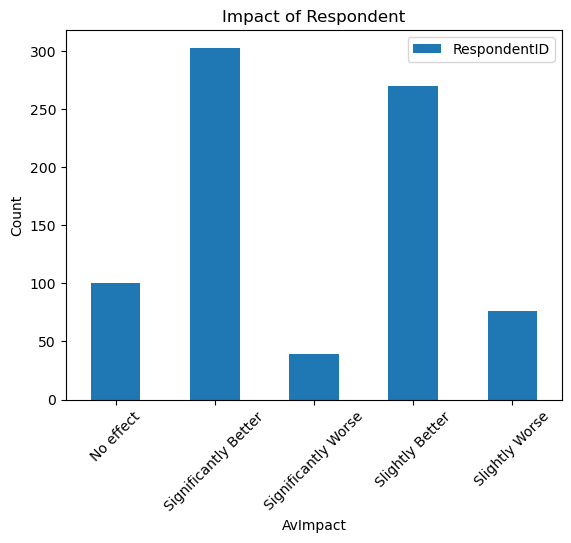

In [4]:
# Plot the bar chart
df_AvImpact.plot.bar(rot=0)

# Set the labels and title
plt.xticks(rotation=45)
plt.xlabel('AvImpact')
plt.ylabel('Count')
plt.title('Impact of Respondent')

# Display the chart
plt.show()

In [9]:
df_AvImpact

,RespondentID
AvImpact,
No effect,100
Significantly Better,303
Significantly Worse,39
Slightly Better,270
Slightly Worse,76


In [6]:
df_AvImpact.reset_index(inplace=True)
df_AvImpact.columns = ['AvImpact','Count']

In [7]:
# Calculate the percentage
total_count = df_AvImpact['Count'].sum()
df_AvImpact['Percentage'] = df_AvImpact['Count'] / total_count * 100

# Display the dataframe with percentages
print(df_AvImpact)

               AvImpact  Count  Percentage
0             No effect    100   12.690355
1  Significantly Better    303   38.451777
2   Significantly Worse     39    4.949239
3       Slightly Better    270   34.263959
4        Slightly Worse     76    9.644670


#### Majority of participants think the Auto Vehicles will have a better impact on traffic injuries and fatalities.

In [5]:
# Group the data by 'Age' and calculate the count of each 'AvImpact' category
df_AvImpact_byAge = av_2019Survey.groupby(['Age', 'AvImpact']).size().unstack()

<AxesSubplot:title={'center':'AvImpact by Age'}, xlabel='Age', ylabel='Count'>

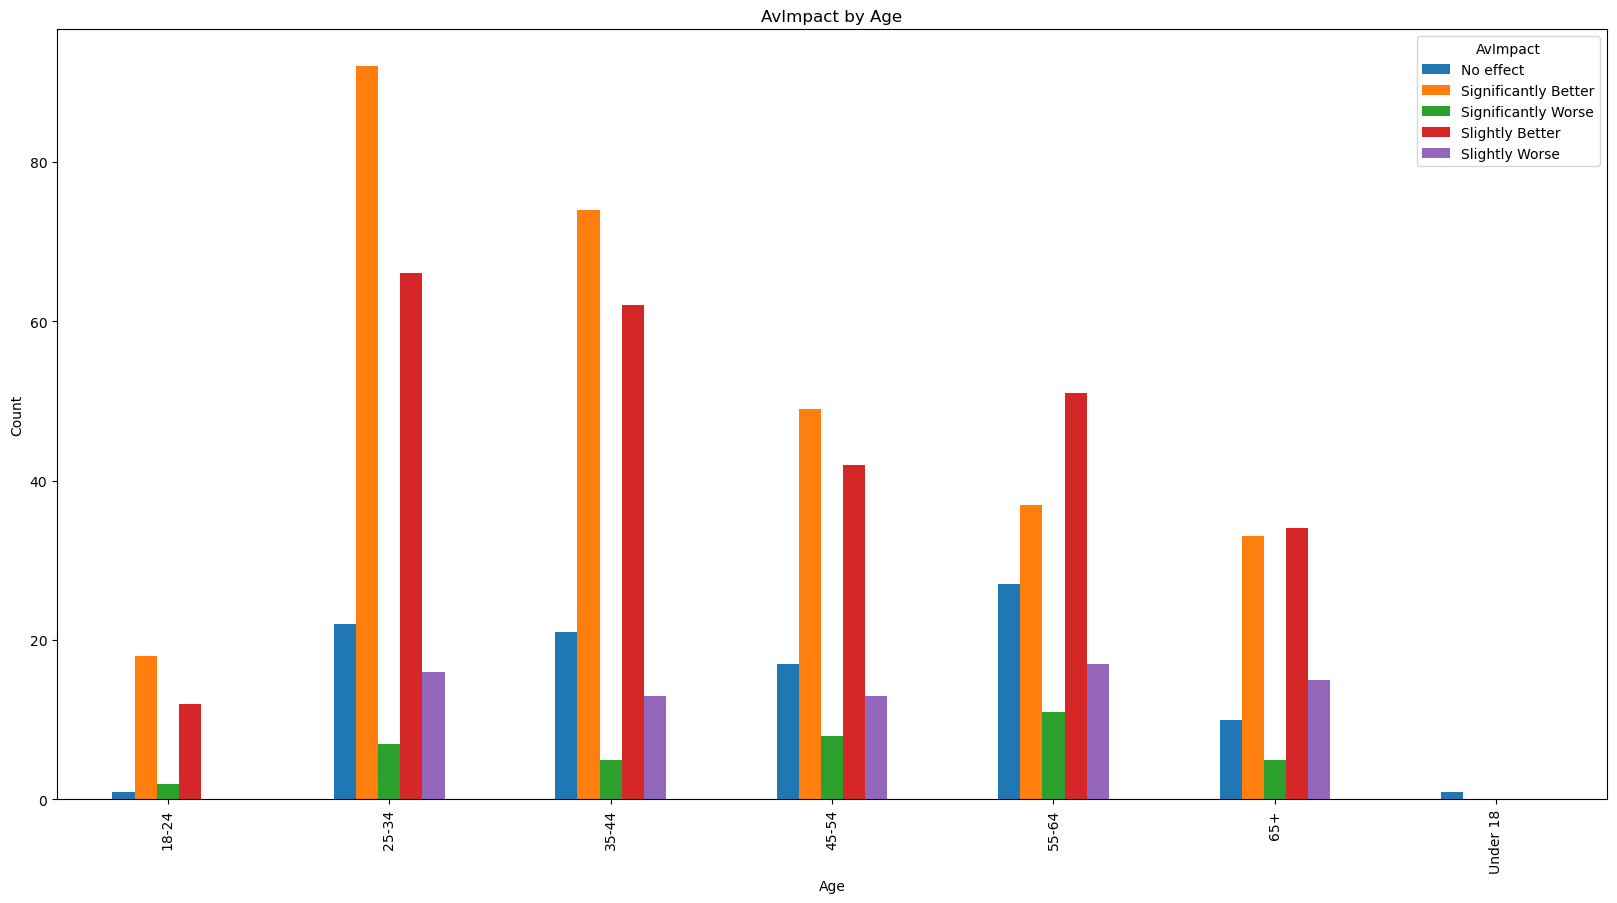

In [6]:
# Plot the grouped data
# df_AvImpact_byAge.plot(kind='bar', stacked=True)

# Set the desired size of the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('AvImpact by Age')

# Plot the grouped data
df_AvImpact_byAge.plot(kind='bar', ax=ax)


In [7]:
#Group by Age
df_Age = av_2019Survey.groupby('Age').agg({
    'RespondentID': 'count'
})
df_Age

,RespondentID
Age,
18-24,34
25-34,205
35-44,176
45-54,129
55-64,145
65+,98
Under 18,1


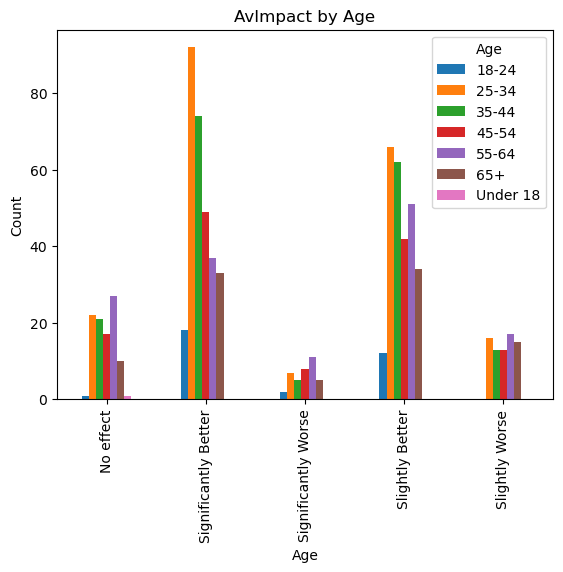

In [10]:
# Group the data by 'AvImpact' and calculate the count of each 'Age' category
df_Age_AvImpact = av_2019Survey.groupby(['AvImpact', 'Age']).size().unstack()

# Plot the grouped data
df_Age_AvImpact.plot(kind='bar')

# Plot the grouped data


# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('AvImpact by Age')

# Display the chart
plt.show()

In [14]:
#Group by Age
df_Age = av_2019Survey.groupby('Age').agg({
    'RespondentID': 'count'
})
df_Age

,RespondentID
Age,
18-24,34
25-34,205
35-44,176
45-54,129
55-64,145
65+,98
Under 18,1


## Correlation Analysis

In [11]:

import scipy.stats as stats

# Select the columns of interest (dependent variable and independent variables)
columns_of_interest_1 = ['AvImpact', 'FamiliarityNews', 'FamiliarityTech', 'SharedCyclist', 'SharedPedestrian', 'SafeAv', 'SafeHuman','ReportSafetyIncident', 'ArizonaCrash', 'Age']
df1 = av_2019Survey[columns_of_interest_1]

# Handling missing values if necessary
df1.dropna(inplace=True)  # Remove rows with missing values

# Categorical variables: Chi-Square Test of Independence
categorical_vars = ['FamiliarityNews', 'FamiliarityTech', 'SharedCyclist', 'SharedPedestrian', 'ReportSafetyIncident', 'ArizonaCrash', 'Age']

for var in categorical_vars:
    contingency_table = pd.crosstab(df1['AvImpact'], df1[var])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f'Chi-Square Test of Independence between AvImpact and {var}:')
    print(f'Chi-square statistic: {chi2}')
    print(f'p-value: {p_value}')
    print()


Chi-Square Test of Independence between AvImpact and FamiliarityNews:
Chi-square statistic: 107.89976254046921
p-value: 1.1230747446149663e-15

Chi-Square Test of Independence between AvImpact and FamiliarityTech:
Chi-square statistic: 104.41011509622234
p-value: 7.58239390786594e-17

Chi-Square Test of Independence between AvImpact and SharedCyclist:
Chi-square statistic: 25.326990355545824
p-value: 0.0013680640510576533

Chi-Square Test of Independence between AvImpact and SharedPedestrian:
Chi-square statistic: 31.770161501708184
p-value: 0.00010239522867610294

Chi-Square Test of Independence between AvImpact and ReportSafetyIncident:
Chi-square statistic: 27.432193943794726
p-value: 0.000595175525812886

Chi-Square Test of Independence between AvImpact and ArizonaCrash:
Chi-square statistic: 267.17157620904067
p-value: 1.5328841708201278e-47

Chi-Square Test of Independence between AvImpact and Age:
Chi-square statistic: 38.5402521362788
p-value: 0.030499256116509887



C:\Users\HW\AppData\Local\Temp\ipykernel_14392\3612047407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)  # Remove rows with missing values


In [12]:
columns_of_interest_2 = ['AvImpact', 'SafeAv']  # Add more independent variables if needed
df2 = av_2019Survey[columns_of_interest_2]

# Handling missing values if necessary
df2.dropna(inplace=True)  # Remove rows with missing values

# Convert 'AvImpact' column to categorical type
df2['AvImpact'] = pd.Categorical(df2['AvImpact'])

# Perform Kruskal-Wallis test
for category in df2['AvImpact'].cat.categories:
    data = df2[df2['AvImpact'] == category]['SafeAv']
    statistic, p_value = stats.kruskal(data, df2['SafeAv'])
    print(f'Kruskal-Wallis test between AvImpact: {category} and SafeAv:')
    print(f'Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print()

Kruskal-Wallis test between AvImpact: No effect and SafeAv:
Statistic: 18.854090293716126
p-value: 1.4110818932064235e-05

Kruskal-Wallis test between AvImpact: Significantly Better and SafeAv:
Statistic: 102.06177364332319
p-value: 5.3817095841922996e-24

Kruskal-Wallis test between AvImpact: Significantly Worse and SafeAv:
Statistic: 88.64776829755925
p-value: 4.717585606841694e-21

Kruskal-Wallis test between AvImpact: Slightly Better and SafeAv:
Statistic: 0.5851167114313576
p-value: 0.4443136932193271

Kruskal-Wallis test between AvImpact: Slightly Worse and SafeAv:
Statistic: 87.45587494552737
p-value: 8.618115049915844e-21



C:\Users\HW\AppData\Local\Temp\ipykernel_14392\2212169319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)  # Remove rows with missing values
C:\Users\HW\AppData\Local\Temp\ipykernel_14392\2212169319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AvImpact'] = pd.Categorical(df2['AvImpact'])


In [14]:
columns_of_interest_2 = ['AvImpact', 'SafeHuman']  # Add more independent variables if needed
df2 = av_2019Survey[columns_of_interest_2]

# Handling missing values if necessary
df2.dropna(inplace=True)  # Remove rows with missing values

# Convert 'AvImpact' column to categorical type
df2['AvImpact'] = pd.Categorical(df2['AvImpact'])

# Perform Kruskal-Wallis test
for category in df2['AvImpact'].cat.categories:
    data = df2[df2['AvImpact'] == category]['SafeHuman']
    statistic, p_value = stats.kruskal(data, df2['SafeHuman'])
    print(f'Kruskal-Wallis test between AvImpact: {category} and SafeHuman:')
    print(f'Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print()

Kruskal-Wallis test between AvImpact: No effect and SafeHuman:
Statistic: 4.256599450405382
p-value: 0.039098113571059114

Kruskal-Wallis test between AvImpact: Significantly Better and SafeHuman:
Statistic: 11.358265907223918
p-value: 0.0007511292245387746

Kruskal-Wallis test between AvImpact: Significantly Worse and SafeHuman:
Statistic: 3.754681829469371
p-value: 0.05265981695494082

Kruskal-Wallis test between AvImpact: Slightly Better and SafeHuman:
Statistic: 0.6888200771301259
p-value: 0.40656600638036466

Kruskal-Wallis test between AvImpact: Slightly Worse and SafeHuman:
Statistic: 4.393142636366784
p-value: 0.03608374345565693



C:\Users\HW\AppData\Local\Temp\ipykernel_14392\3002083665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)  # Remove rows with missing values
C:\Users\HW\AppData\Local\Temp\ipykernel_14392\3002083665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AvImpact'] = pd.Categorical(df2['AvImpact'])


In [ ]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(df['dependent_var'], df['independent_var'])

# Plot the stacked or grouped bar chart
sns.set(style="whitegrid")
cross_tab.plot(kind='bar', stacked=True)  # or stacked=False for a grouped bar chart

# Customize the plot
plt.title('Correlation between Dependent and Independent Variables')
plt.xlabel('Dependent Variable')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### Process Categorical Data

In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


X_categoric = av_2019Survey.loc[:, ['FamiliarityNews','FamiliarityTech','SharedCyclist','SharedPedestrian','ProvingGround',
                                    'Speed25Mph','TwoEmployeesAv','SchoolZoneManual','ShareTripData', 'SharePerformanceData', 
                                    'ReportSafetyIncident','ArizonaCrash','BikePghMember','AutoOwner','SmartphoneOwner','Age']].values

#onehotencoding
ohe = OneHotEncoder()
categoric_data = ohe.fit_transform(X_categoric).toarray()
categoric_df = pd.DataFrame(categoric_data)
categoric_df.columns = ohe.get_feature_names_out()
categoric_df.head()

,x0_Not at all,x0_To a large extent,x0_To a moderate extent,x0_To little extent,x0_To some extent,x0_nan,x1_Extremely familiar,x1_Mostly familiar,x1_Not familiar at all,x1_Somewhat familiar,...,x14_Yes,x14_nan,x15_18-24,x15_25-34,x15_35-44,x15_45-54,x15_55-64,x15_65+,x15_Under 18,x15_nan
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_numeric_data = av_2019Survey.loc[:, ['SafeAv','SafeHuman']].values
numeric_df = pd.DataFrame(X_numeric_data)
numeric_df.columns = ['SafeAv','SafeHuman']

In [20]:
X = pd.concat([categoric_df,numeric_df], axis = 1)

In [21]:
X.head()

,x0_Not at all,x0_To a large extent,x0_To a moderate extent,x0_To little extent,x0_To some extent,x0_nan,x1_Extremely familiar,x1_Mostly familiar,x1_Not familiar at all,x1_Somewhat familiar,...,x15_18-24,x15_25-34,x15_35-44,x15_45-54,x15_55-64,x15_65+,x15_Under 18,x15_nan,SafeAv,SafeHuman
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0


In [22]:
y = av_2019Survey.loc[:, 'AvImpact'].values